# 4. 신경망 학습

* 이번장의 주제는 신경망 학습이다. 여기서 <span style="background-color:yellow">학습</span>이란 <span style="background-color:yellow">훈련데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것</span>을 말한다.
* 이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 <span style="background-color:yellow">손실 함수</span>를 소개한다. <span style="background-color:yellow">이 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표</span>이다.
* 이번 장에서는 손실함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 소개한다.

## 4.1 데이터에서 학습

* 신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다.
* 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다.
* 만약 모든 매개변수를 수작업으로 결정한다고 상상해보면 매우 끔직할 것이다.

### 4.1.1 데이터 주도 학습

* Machine Learning의 중심에는 데이터가 존재한다. 
* 이처럼 데이터가 이끄는 접근 방식 덕에 사람 중심 접근에서 벗어날 수 있다.
* Machine Learning은 사람의 개입을 최소화하고 수집한 데이터로부터 <span style="color:blue">패턴</span>을 찾으려 시도한다. 게다가 신경망과 딥러닝은 기존의 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해주는 중요한 특성을 지닌다.

* 구체적인 문제를 하나 생각해보자. 가령 이미지에서'5'라는 숫자를 인식하는 프로그램을 구현한다고 해보자. 비교적 단순해 보이는 문제이지만, 당장 머릿속에 떠오르는 알고리즘이 존재하는가?
* 사람이라면 어렵지 않게 인식하지만, 그 안에 숨은 규칙성을 명확한 논리로 풀기가 만만치 않다.
* 사람마다 버릇이 달라 '5'를 특징짓는 규칙을 찾기도 쉽지 않고 시간도 오래 걸릴 것 같다는 느낌이 든다.

* 이쯤되면 '5'를 인식하는 알고리즘을 밑바닥부터 '설계'하는 대신, 주어진 데이터를 활용해서 해결하고 싶을 것이다.
* 그런 방법의 하나로, 이미지에서 특징을 추출하고 그 <span style="color:blue">특징</span>의 패턴을 기계학습 기술로 학습하는 방법이 있다.
* 여기서 말하는 특징은 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다.
* 이미지의 특징은 보통 Vector로 기술하고, CV 분야에서는 <span style="color:brown">SIFT, SURF, HOG</span> 등의 특징을 많이 사용한다.
* 이런 특징을 사용하여 이미지 데이터를 Vector로 변환하고, 변환된 Vector를 가지고 지도 학습 방식의 대표 분류 기법인 <span style="color:blue">SVM, KNN</span> 등으로 학습할 수 있다.

### 4.1.2 훈련 데이터와 시험 데이터

* Machine Learning 문제는 데이터를 <span style="color:blue">훈련 데이터</span>와 <span style="color:blue">시험 데이터</span>로 나눠 학습과 실험을 수행하는 것이 일반적이다.
* 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것이다.
* 왜 훈련 데이터와 시험 데이터를 나누어야 할까?
* 우리가 원하는 것은 범용적으로 사용할 수 있는 모델이기 때문이다.
* 이 범용능력을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리하는 것이다.

* 범용능력은 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 방법이다.
* 이 범용능력을 획득하는 것이 기계학습의 <span style="color:red">최종 목표</span>이다.

* 만약 수중에 있는 훈련데이터만 잘 판별한다면 그 데이터에 포함된 사람의 글씨체만 학습했을 가능성이 크다.
* 그래서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다.
* 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는 엉망인 일도 벌어진다.
* 참고로 한 데이터셋에만 지나치게 최적화 된 상태를 <span style="color:blue">오버피팅</span>이라고 한다.
* 오버피팅을 피하는 것이 Machine Learning의 중요한 과제이기도 한다.

## 4.2 손실 함수 - Loss function

* 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이다.
* 신경망 학습에서 사용하는 지표는 <span style="background-color:yellow">손실 함수</span>라 한다.
* 이 손실함수는 임의의 함수를 사용할 수도 있지만, <span style="background-color:yellow">일반적으로는 오차제곱합(SSE)와 교차 엔트로피 오차(CEE)</span>를 사용한다.

### 4.2.1 오차제곱합 - Sums of Squares for Error(SSE)

* 가장 많이 쓰이는 손실함수는 <span style="color:red">오차제곱합</span>이다. 수식으로는 다음과 같다.

### $E = {1\over2}{\sum_{k} {({y_k}-{t_k}})^2}$

* 여기서 $y_k$는 신경망의 출력(신경망이 추정한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.
* 이 오차제곱합을 파이썬으로 구현해보자.

In [1]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

* 여기서 인수 $y$와$t$는 넘파이 배열이다.
* 이 함수를 실제로 사용해보자.

In [2]:
import numpy as np

# 정답 = 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex-1 : '2'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [3]:
# ex-2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

0.5975

* 두 가지 예를 살펴보았다.
* 첫번째의 예는 정답이 '2'이고 신경망의 출력도 '2'에서 가장 높은 경우이다
* 하지만 두번째 예에서는 정답은 똑같이 '2'지만, 신경망의 출력은 '7'에서 가장 높다.
* 이 실험의 결과로 첫번째 예의 손실함수 출력이 작으며 정답 레이블과의 오차도 작은것을 알 수 있다.
* <span style="background-color:yellow">즉, 오차제곱합 기준으로는 첫번째 추정 결과가 정답에 더 가까운 것으로 판단할 수 있다.</span>

### 4.2.2 교차 엔트로피 오차 - Cross Entropy Error(CEE)

* 또 다른 손실함수로서 <span style="color:red">교차 엔트로피 오차</span>도 자주 이용한다.
* 교차 엔트로피의 수식은 다음과 같다.
### $E = -{\sum_{k} {{t_k}{\log_e {y_k}}}}$

* $y_k$는 신경망의 출력, $t_k$는 정답 레이블이다.
* $t_k$는 정답에 해당하는 인덱스만 1이고 나머지는 0 이다.(ont_hot encoding)
* 그래서 위 식은 실질적으로 정답일 때의 추정($t_k$가 1일때의 $y_k$)의 자연로그를 계산하는 식이 된다.
* 예를 들어, 정답 레이블은 '2'가 정답이라 하고 이 때의 신경망 출력이 0.6 이라면, 교차 엔트로피 오차는 $-\log_e 0.6 = 0.51$이 된다.
* 또한, 같은 조건에서 신경망 출력이 0.1 이라면, $-\log_e 0.1 = 2.30$이 된다.
* 즉, <span style="background-color:yellow">교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.</span>
* 한편, 다음은 자연로그의 그래프이다.

[]

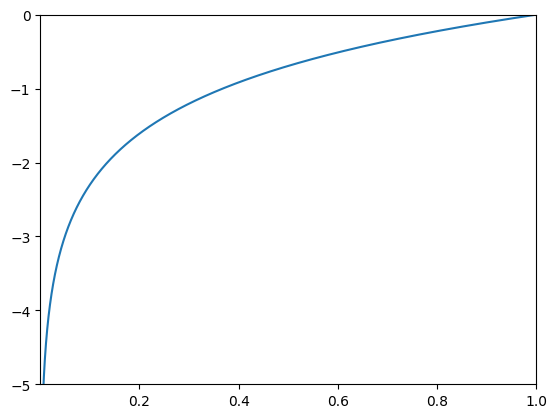

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0001, 1, 0.0001)
y = np.log(x)

plt.plot(x, y)
plt.ylim(-5, 0)
plt.xlim(0.0001, 1.0)
plt.plot()

* 그림에서 보듯이 $x$가 1일때 $y$는 0이 되고 $x$가 0에 가까워질수록 $y$의 값은 점점 작아진다.
* 위 식도 마찬가지로, <span style="background-color:yellow">정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다.</span> 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.

* 그럼 교차 엔트로피 오차를 구현해보자.

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

* 여기에서 y와 t는 넘파이 배열이다.
* 그런데 코드 마지막을 보면 np.log를 계산할 때 아주 작은 값인 delta를 더했다.
* 이는 np.log() 함수에 0을 입력하면 -inf가 되어 더이상 계산을 진행할 수 없게 되기 때문이다.
* 아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 -inf가 되지 않도록 한 것이다.
* 그럼 이 함수를 써서 간단한 계산을 해보자.

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

* 첫번째 예는 정답일 때의 출력이 0.6인 경우로, 이 때의 교차 엔트로피 오차는 약 0.51이다.
* 두번째 예는 정답일 때는 출력이 0.1이고, 이 때 교차 엔트로피 오차는 무려 2.3이다.
* 즉, 결과(오차 값)가 더 작은 첫뻔재 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합 판단과 일치한다.

### 4.2.3 미니배치 학습

* 지금까지 데이터 하나에 대한 손실 함수만 생각해왔으니, 이제 훈련 데이터 모두에 손실 함수의 합을 구하는 방법을 생각해보자.
* 예를 들어 교차 엔트로피 오차는 다음과 같다.

### $E = -{1 \over N}{\sum_{n}}{\sum_{k} {{t_nk}{\log_e {y_nk}}}}$

* 이 때 데이터가 $N$개라면 $t_{nk}$는 $n$번째 데이터의 $k$번째 값을 의미한다.($y_{nk}$는 신경망의 출력, $t_{nk}$는 정답 레이블이다.)
* 수식이 복잡해 보이지만, 데이터 하나에 대한 교차 엔트로피 오차 수식을 단순히 $N$개의 데이터로 확장했을 뿐이다.
* 다만, 마지막에  $N$으로 나누어 정규화하고 있다.
* $N$으로 나눔으로써 '평균 손실 함수'를 구하는 것이다.
* 이렇게 평균을 구해 사용하면 훈련 데이터 개수와 상관없이 언제든 통일된 지표를 얻을 수 있다.

* 그런데 MNIST 데이터셋은 훈련데이터가 60,000개이다...
* 그래서 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 좀 걸린다. 더 나아가 빅데이터 수준이 되면 그 수는 수백에서 수천만개가 넘는 거대한 값이 되기도 한다.
* 이 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 비현실적이다.
* 이런 경우 데이터 일부를 추려 전체의 <span style="color:blue">근사치</span>로 이용할 수 있다.
* 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행한다.
* 이 일부를 <span style="color:red">미니배치</span>라고 한다.
* 가령 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것이다.
* 이러한 학습 방법을 <span style="color:red">미니배치학습</span>이라고 한다.

* 그렇다면 미니배치 학습을 구현하는, 즉 훈련 데이터에서 지정한 수의 데이터를 무작위로 골라내는 코드를 작성해보자.

In [8]:
import numpy as np
from mnist import load_mnist

(train_images, train_labels), (test_images, test_labels) = load_mnist(normalize=False, one_hot_label=True)

print(train_images.shape)
print(train_labels.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = train_images.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

train_images_batch = train_images[batch_mask]
train_labels_batch = train_labels[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [10]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

* 이 코드에서 y는 신경망의 출력, t는 정답 레이블이다.
* y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터 형상을 바꿔준다.
* 그리고 배치의 크기로 나눠 정규화하고 이미지 한장 당 평균의 교차 엔트로피 오차를 계산한다.

* 정답 레이블이 one-hot encoding이 아니라 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있다.

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

* 이 구현에서는 one-hot encoding일 때 t = 0인 원소는 교차 엔트로피 오차도 0이므로 그 계산은 무시해도 좋다는 것이 핵심이다.
* 다시 말하면, 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다.
* 그래서 one-hot encoding 시 t$*$np.log(y) 였던 부분을 레이블 표현일 때는 np.log(y[np.arange(batch_size), t])로 구현한다.

### 4.2.5 왜 손실 함수를 설정하는가?

* 왜 굳이 손실 함수를 사용해야 하는걸까?
* 숫자인식의 경우도 우리의 목표는 <span style="color:blue">높은 정확도</span>를 끌어내는 매개변수 값을 찾는 것이다.
* 그렇다면 정확도라는 지표를 놔두고 <span style="color:blue">손실 함수의 값</span>이라는 우회적인 방법을 택할까?

* 이는 신경망 학습에서의 <span style="color:blue">미분</span>의 역할에 주목한다면 해결된다.
* 간단하게 설명하자면, 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.
* 이 때 매개변수의 미분(정확하게는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

* 가령 여기에 가상의 신경망이 있고 그 신경망의 어느 한 가중치 매개변수에 주목한다고 하자.
* 이 때 그 가중치 매개변수의 손실함수의 미분이란 <span style="color:blue">'가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나'</span>라는 의미이다.
* 만약 이 미분값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.
* 반대로 미분값이 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.
* 그러나 미분값이 0이면 가중치 매개변수를 어느쪽으로 움직여도 손실 함수의 값은 줄어들지 않는다.
* 그래서 가중치 매개변수의 갱신은 거기서 멈춘다.

* 정확도를 지표로 삼아서는 안되는 이유는 미분값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다.
* 지금까지의 설명을 정리하면 다음과 같다.
* <span style="background-color:yellow">신경망을 학습할 때 정확도를 지표로 삼으면 안된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.</span>

* 정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이 되는 이유는 무엇일까?
* 구체적은 예를 보자. 한 신경망이 100장의 훈련 데이터 중 32장을 올바르게 인식한다고 한다.
* 그렇다면 정확도는 32%이다.
* 만약 정확도가 지표였다면 가중치 매개변수의 값을 조금 바꾼다해도 정확도는 그대로 32%일 것이다.
* 즉, 매개변수를 약간만 조정해서는 정확도가 개선되지않고 일정하게 유지된다.
* 혹, 정확도가 개선된다고 해도 그 값은 32.0123%와 같은 연속적인 변화보다는 33%나 34%처럼 불연속적인 띄엄띄엄한 값으로 바뀐다.

* 한편, 손실함수를 지표로 삼았다면 어떨까?
* 현재의 손실함수 값은 0.92543... 같은 수치로 나타난다.
* 그리고 매개변수의 값이 조금 변하면 그에 반응하여 손실함수 값도 0.92342...처럼 연속적으로 변화한다.

* 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라고 그 값이 불연속적으로 갑자기 변한다.
* 이는 계단함수를 활성화 함수로 사용하지 않는 이유와도 들어맞는다.
* 계단함수의 미분은 대부분의 장소에서 0이다. 그 결과, 손실함수로 계단함수를 지표로 삼는것이 아무 의미가 없게 된다.
* 계단함수는 한순간의 변화를 일으키지만, Sigmoid 함수의 미분은 출력이 연속적으로 변하고 기울기도 연속적으로 변한다.
* 즉, Sigmoid 함수의 미분은 어느 장소에서라도 0이 되지 않는다.
* 이는 신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있는 것이다.